In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
data =pd.read_csv("ev market.csv")
data.head()

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
0,Audi RS e-tron GT,93,480,5,9,204,250,Automatic
1,Audi e-tron GT,93,500,5,9,179,245,Automatic
2,Audi e-tron,95,484,5,9,123,200,Automatic
3,Tata Nexon EV,30,312,5,9,17,180,Automatic
4,Tata Tigor EV,26,306,5,9,14,120,Automatic


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand Name        18 non-null     object
 1   Battery Capacity  18 non-null     int64 
 2   Range             18 non-null     int64 
 3   Num of Seats      18 non-null     int64 
 4   Charging T        18 non-null     int64 
 5   Price             18 non-null     int64 
 6   TopSpeed          18 non-null     int64 
 7   Transmission      18 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.2+ KB


In [6]:
data.isna().sum()

Brand Name          0
Battery Capacity    0
Range               0
Num of Seats        0
Charging T          0
Price               0
TopSpeed            0
Transmission        0
dtype: int64

<ipython-input-8-1dbe5b0ddb4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


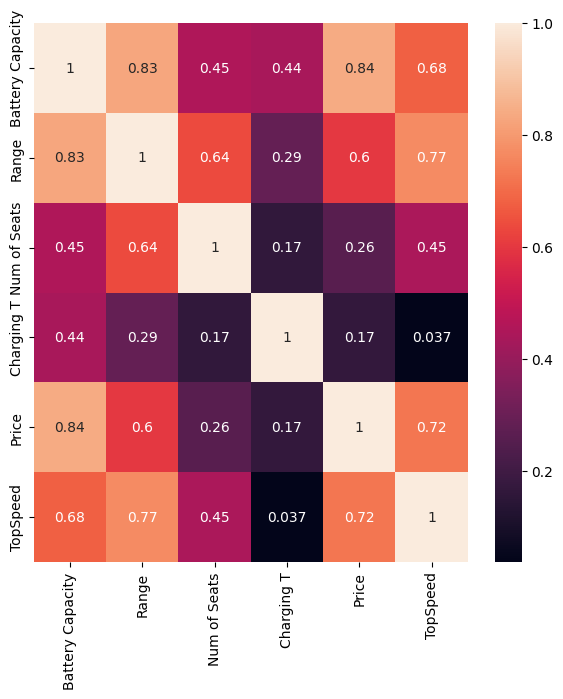

In [8]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

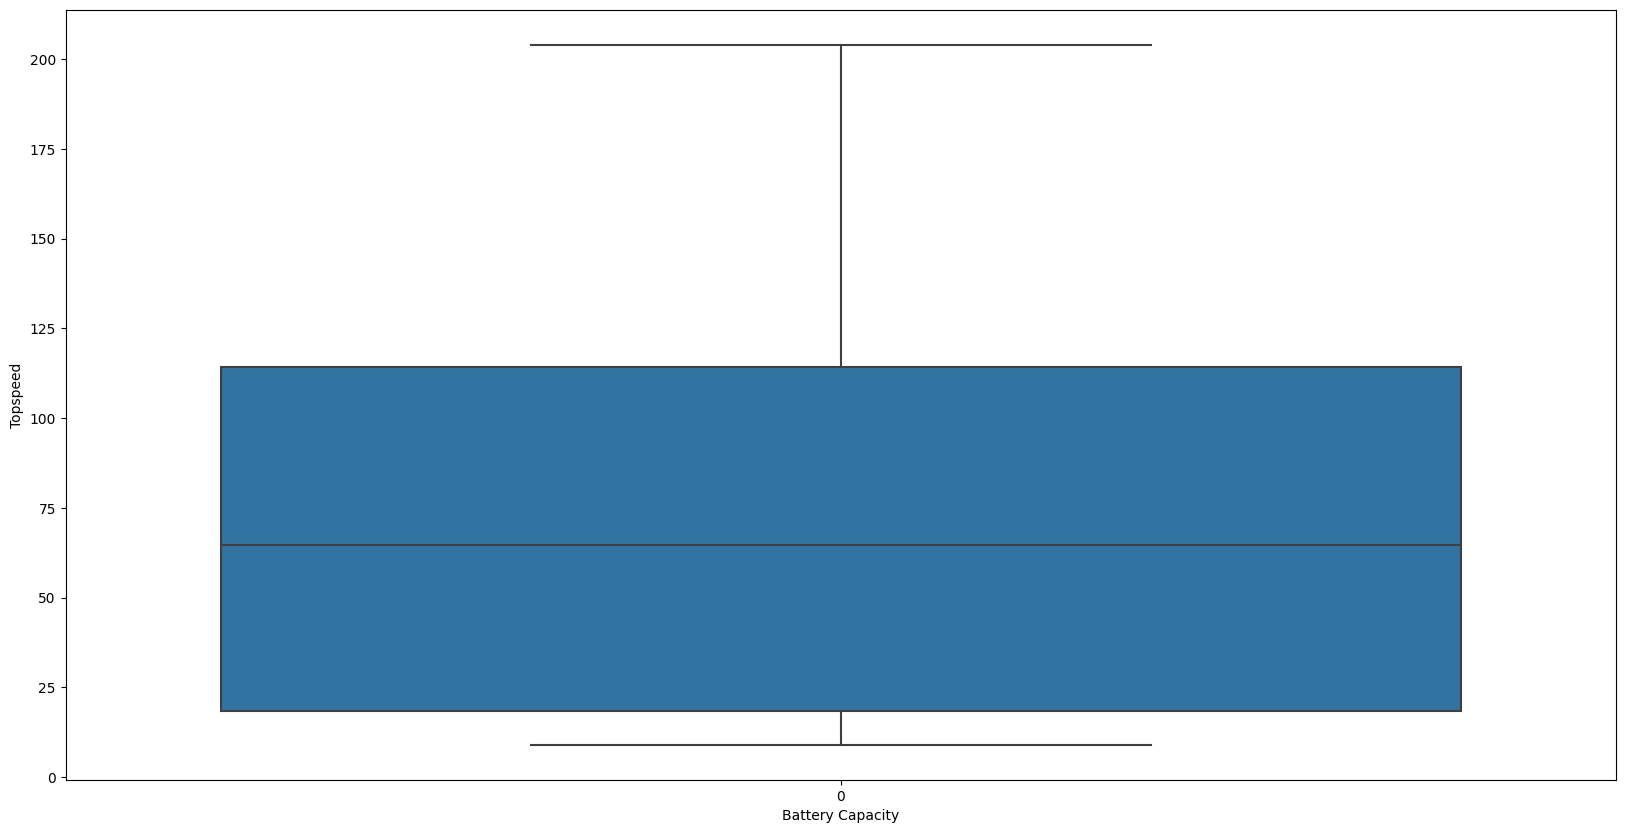

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data.Price)
plt.xlabel("Battery Capacity")
plt.ylabel("Topspeed")
plt.show()

In [20]:
pip install matplotlib scikit-learn


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

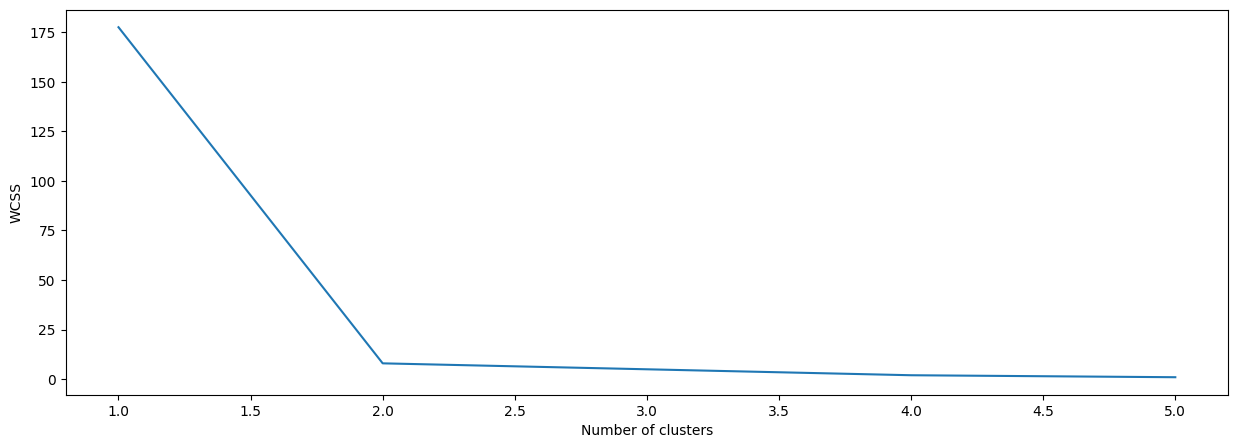

In [23]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data
data = np.array([[2, 5], [3, 6], [4, 7], [10, 12], [11, 13], [12, 14]])

wcss = []
for k in range(1, min(len(data), 15)):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, min(len(data), 15)), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(data)
data['cluster_number'] = kmeans.labels_

print(data)


   feature1  feature2  cluster_number
0         2         5               1
1         3         6               1
2         4         7               2
3        10        12               0
4        11        13               0
5        12        14               3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


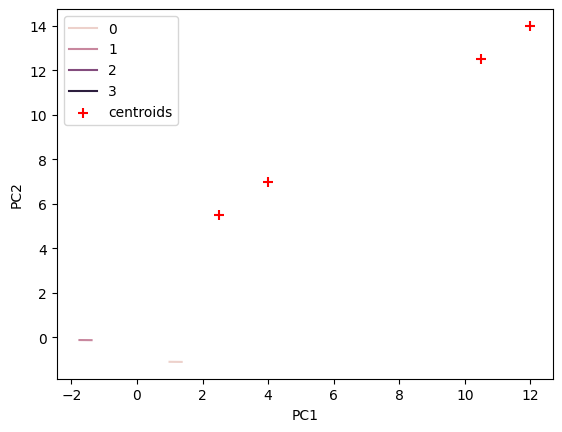

In [31]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

x = data.values
x_scaled = preprocessing.scale(x)
pca = PCA(n_components=min(x_scaled.shape[0], x_scaled.shape[1]))
pca_result = pca.fit_transform(x_scaled)

pf = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
sns.lineplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()


<Axes: xlabel='cluster_number'>

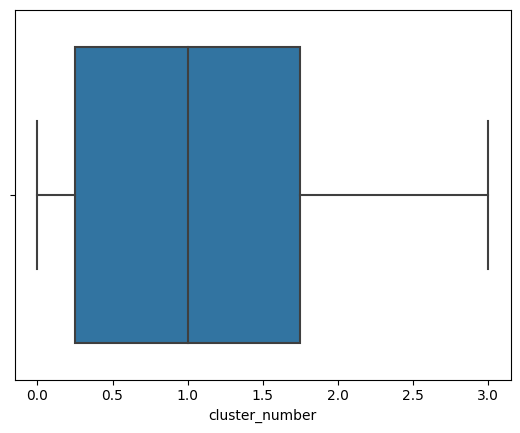

In [40]:
sns.boxplot(x='cluster_number', data=data)


In [44]:
data.corr()


,feature1,feature2,cluster_number
feature1,1.000000,0.999613,0.000000
feature2,0.999613,1.000000,0.021727
cluster_number,0.000000,0.021727,1.000000
